In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# Load dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Preview
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check data types
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [8]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Create 'Month' column
df['Month'] = df['Order Date'].dt.to_period('M')

# Standardize Region & Category
df['Region'] = df['Region'].astype(str).str.strip().str.title()
df['Category'] = df['Category'].astype(str).str.strip().str.title()

# Create 'Revenue' column (same as Sales here)
df['Revenue'] = df['Sales']

# Preview cleaned data
df[['Order Date', 'Month', 'Region', 'Category', 'Revenue']].head()


,Order Date,Month,Region,Category,Revenue
0,2016-11-08,2016-11,South,Furniture,261.9600
1,2016-11-08,2016-11,South,Furniture,731.9400
2,2016-06-12,2016-06,West,Office Supplies,14.6200
3,2015-10-11,2015-10,South,Furniture,957.5775
4,2015-10-11,2015-10,South,Office Supplies,22.3680


In [11]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)  # 🔧 Convert to string for plotting


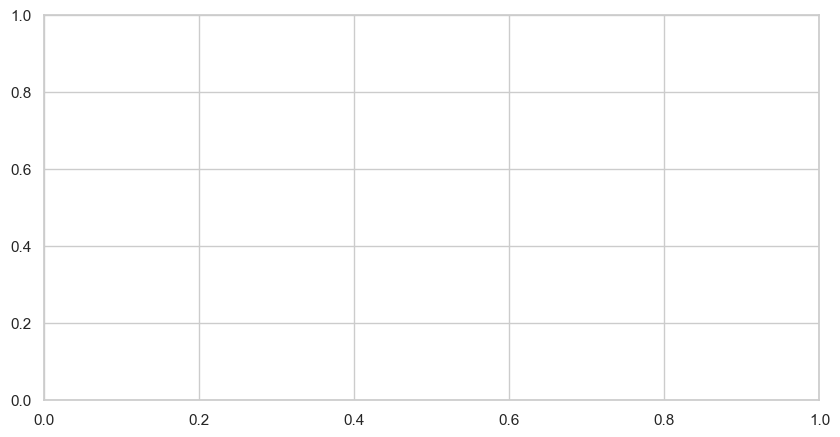

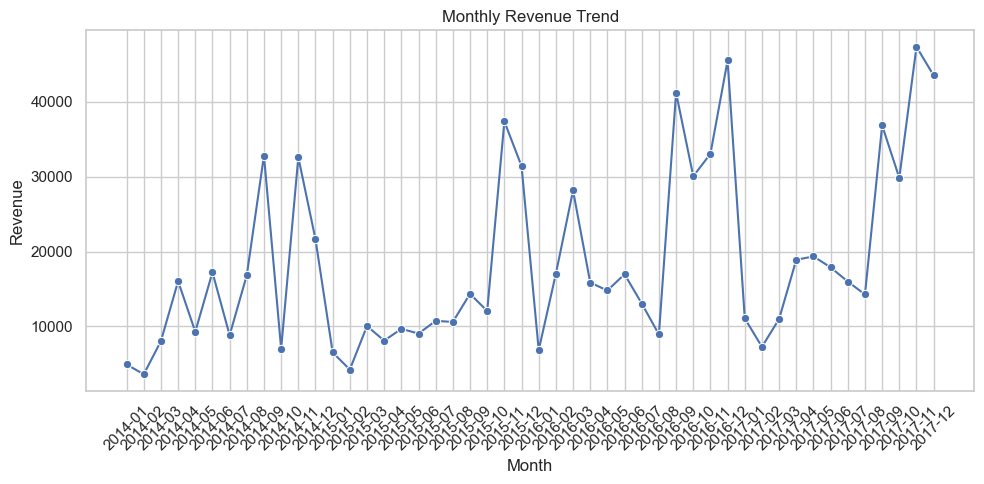

In [12]:
# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

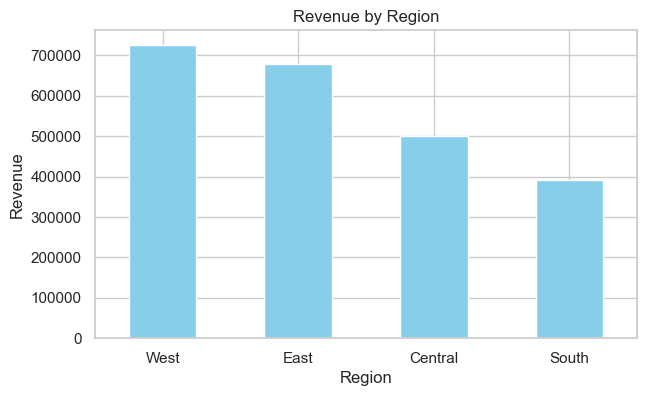

In [13]:
region_sales = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(7,4))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

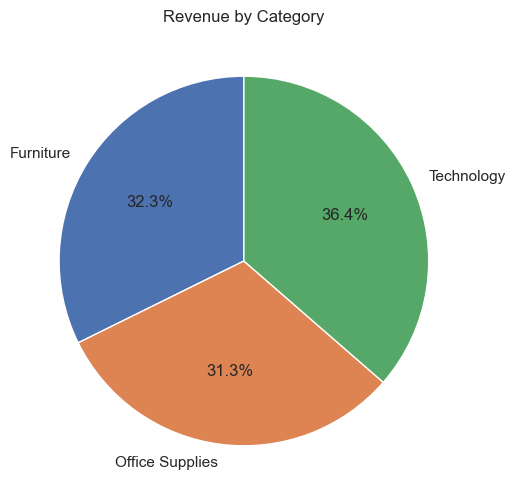

In [14]:
category_sales = df.groupby('Category')['Revenue'].sum()

# Pie chart
plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue by Category")
plt.ylabel("")  # remove y-label
plt.show()


In [15]:
total_revenue = df['Revenue'].sum()
total_orders = df['Order ID'].nunique()

aov = total_revenue / total_orders
print(f"Average Order Value (AOV): ₹{aov:.2f}")


Average Order Value (AOV): ₹458.61


In [16]:
monthly_revenue['Previous Month'] = monthly_revenue['Revenue'].shift(1)
monthly_revenue['Growth %'] = ((monthly_revenue['Revenue'] - monthly_revenue['Previous Month']) / monthly_revenue['Previous Month']) * 100
monthly_revenue[['Month', 'Revenue', 'Growth %']].head()


,Month,Revenue,Growth %
0,2014-01,4923.616,NaN
1,2014-02,3610.402,-26.671739
2,2014-03,8048.773,122.932876
3,2014-04,16040.811,99.295110
4,2014-05,9288.864,-42.092304


In [17]:
df.to_csv("cleaned_superstore.csv", index=False)
